In [1]:
import pandas as pd

In [2]:
pd.read_csv("claimants.csv")

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [3]:
claimants_df=pd.read_csv("claimants.csv")

In [4]:
pd.read_csv("claimants.csv")

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
claimants_df.shape

(1340, 7)

In [6]:
claimants_df.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [7]:
claimants_df.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
claimants_df["CLMSEX"]=claimants_df["CLMSEX"].fillna(1)

claimants_df["CLMINSUR"]=claimants_df["CLMINSUR"].fillna(1)

claimants_df["SEATBELT"]=claimants_df["SEATBELT"].fillna(1)

claimants_df["CLMAGE"]=claimants_df["CLMAGE"].fillna(claimants_df["CLMAGE"].mean())


In [9]:
claimants_df.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [10]:
x=claimants_df.drop(labels=["ATTORNEY","CASENUM"],axis=1)

In [11]:
y=claimants_df[["ATTORNEY"]]

In [12]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [13]:
y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1335,1
1336,0
1337,1
1338,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [16]:
x_train.shape

(1005, 5)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### model=DecisionTreeClassifier()

In [19]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_train_pred=model.predict(x_train)

In [68]:
accuracy_score(y_train,y_train_pred) # Our model is overfitting

0.7582089552238805

In [22]:
y_test_pred=model.predict(x_test)

In [23]:
accuracy_score(y_test,y_test_pred)

0.6388059701492538

In [24]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

[Text(0.5297806043713782, 0.9827586206896551, 'x[4] <= 0.988\ngini = 0.499\nsamples = 1005\nvalue = [520, 485]'),
 Text(0.18738977072310406, 0.9482758620689655, 'x[3] <= 6.5\ngini = 0.397\nsamples = 457\nvalue = [125.0, 332.0]'),
 Text(0.3585851875472411, 0.9655172413793103, 'True  '),
 Text(0.08289241622574955, 0.9137931034482759, 'x[4] <= 0.74\ngini = 0.498\nsamples = 99\nvalue = [46, 53]'),
 Text(0.062232300327538424, 0.8793103448275862, 'x[1] <= 0.5\ngini = 0.487\nsamples = 88\nvalue = [37, 51]'),
 Text(0.04711514235323759, 0.8448275862068966, 'x[3] <= 5.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.04308390022675737, 0.8103448275862069, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.05114638447971781, 0.8103448275862069, 'x[4] <= 0.346\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04711514235323759, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05517762660619804, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.

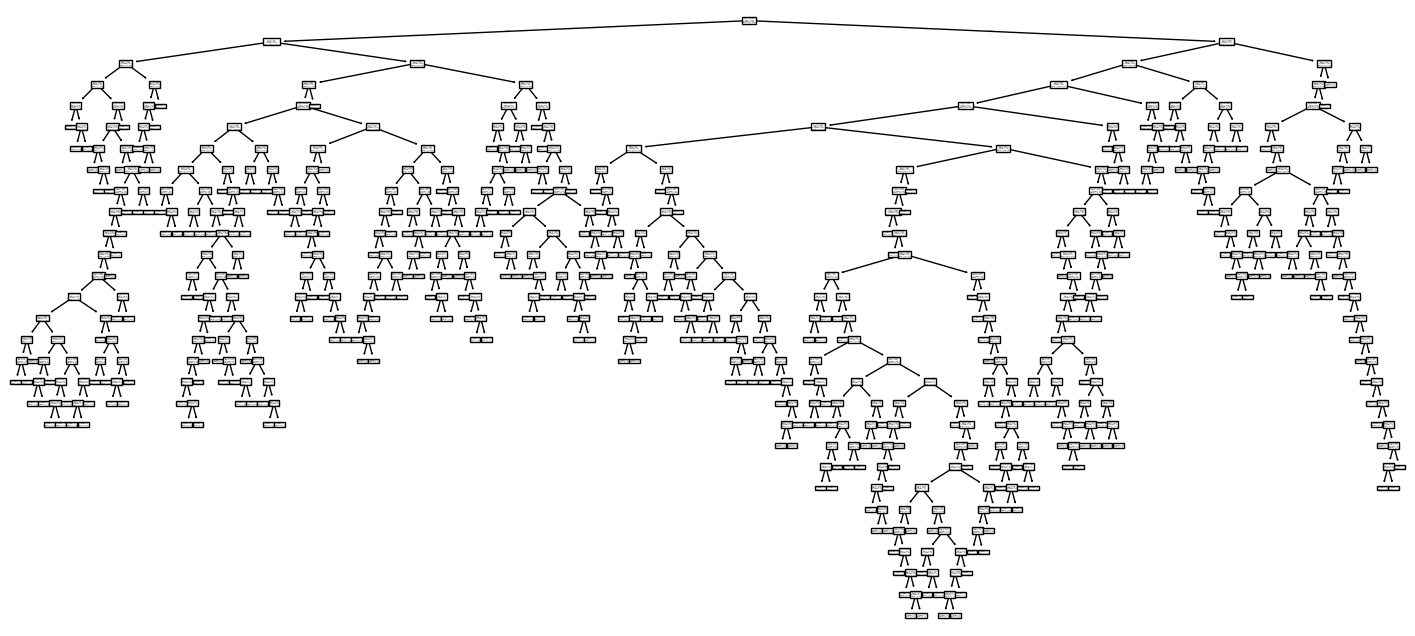

In [25]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model)

In [26]:
model_1=DecisionTreeClassifier(max_depth=5)

In [27]:
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
y_train_pred=model_1.predict(x_train)

In [29]:
y_test_pred=model_1.predict(x_test)

In [30]:
accuracy_score(y_train,y_train_pred)

0.7582089552238805

In [31]:
accuracy_score(y_test,y_test_pred)

0.7074626865671642

[Text(0.5489130434782609, 0.9166666666666666, 'x[4] <= 0.988\ngini = 0.499\nsamples = 1005\nvalue = [520, 485]'),
 Text(0.2717391304347826, 0.75, 'x[3] <= 6.5\ngini = 0.397\nsamples = 457\nvalue = [125.0, 332.0]'),
 Text(0.41032608695652173, 0.8333333333333333, 'True  '),
 Text(0.16304347826086957, 0.5833333333333334, 'x[4] <= 0.74\ngini = 0.498\nsamples = 99\nvalue = [46, 53]'),
 Text(0.08695652173913043, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.487\nsamples = 88\nvalue = [37, 51]'),
 Text(0.043478260869565216, 0.25, 'x[3] <= 5.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.021739130434782608, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.06521739130434782, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13043478260869565, 0.25, 'x[4] <= 0.607\ngini = 0.476\nsamples = 82\nvalue = [32, 50]'),
 Text(0.10869565217391304, 0.08333333333333333, 'gini = 0.486\nsamples = 77\nvalue = [32, 45]'),
 Text(0.15217391304347827, 0.0833333

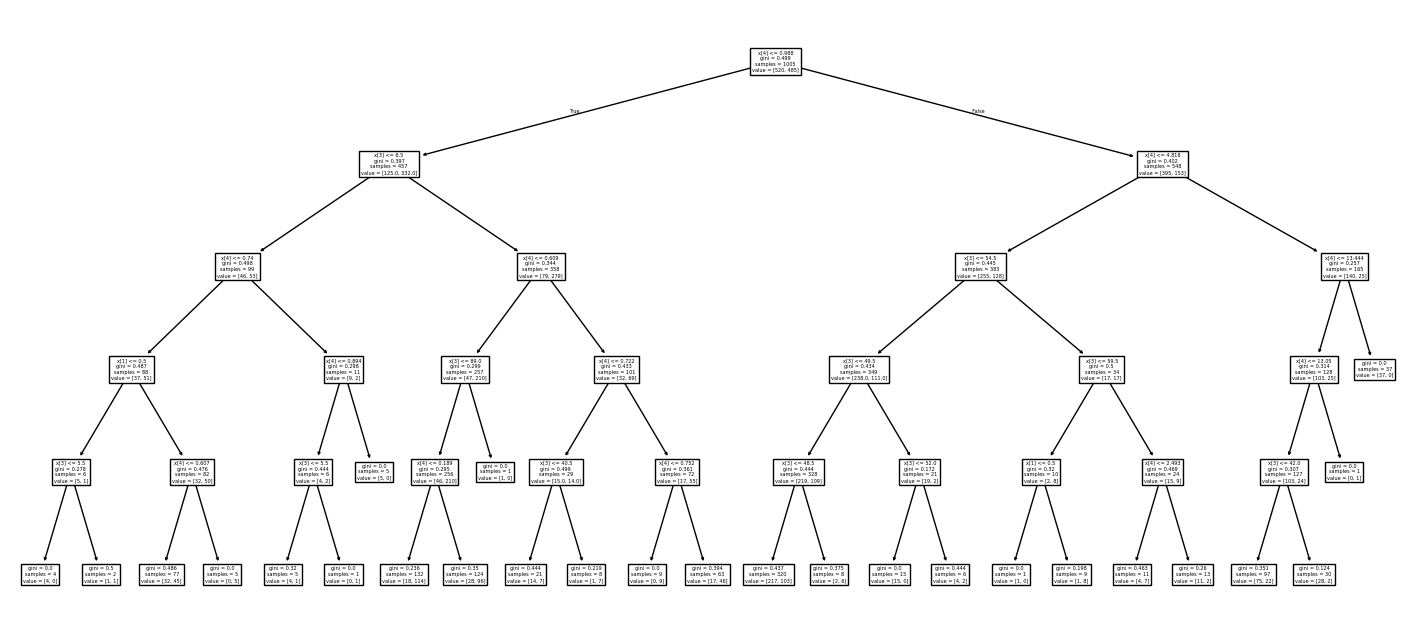

In [32]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model_1)

# GRID SEARCH CV

### HP= MAX_Depth AND CRITERIA

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
Grid_Search=GridSearchCV(estimator=model,param_grid={"criterion":["gini", "entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10]},cv=5)

In [77]:
Grid_Search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [79]:
Grid_Search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [81]:
print(Grid_Search.best_params_)

{'criterion': 'entropy', 'max_depth': 3}


In [85]:
print(Grid_Search.best_score_)

0.7213930348258706


In [87]:
print(Grid_Search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [93]:
print(Grid_Search.best_index_)

12


In [96]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model_2=RandomForestClassifier()

In [116]:
model_2.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [118]:
y_train_predict=model_2.predict(x_train)

In [120]:
y_train_predict

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [122]:
y_test_predict=model_2.predict(x_test)

In [124]:
y_test_predict

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [126]:
accuracy_score(y_train,y_train_predict)

0.9960199004975124

In [128]:
accuracy_score(y_test,y_test_predict)

0.6985074626865672